In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn import mixture

#### 导入汇总表

In [3]:
pd.set_option('precision', 20)
path='F:/credit_fuzhou/data/'
all_info=pd.read_table(path+'credit_result_1.txt',header=None,names=['名称','分数','经度','纬度','有无处罚','行业类别'])

In [4]:
all_companuy=all_info[all_info['经度']>0]
len(all_companuy)

522943

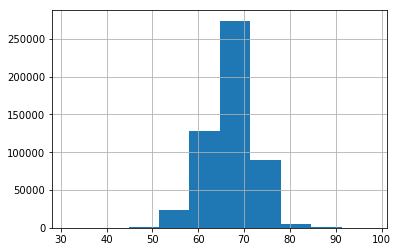

In [5]:
all_companuy['分数'].hist().get_figure()

#### 找出信用较低企业

In [6]:
bad_company=all_companuy[all_companuy['分数']<50]
len(bad_company)

1201

In [7]:
score_bad=bad_company['分数'].tolist()
X_cor_bad=bad_company['经度'].tolist()
Y_cor_bad=bad_company['纬度'].tolist()
ent_bad=bad_company['有无处罚'].tolist()
cate_bad=bad_company["行业类别"].tolist()

In [8]:
X_Y_cor_bad=[[]for i in range(len(X_cor_bad))]
for i in range(len(X_cor_bad)):
    X_Y_cor_bad[i].append(X_cor_bad[i])
for j in range(len(X_cor_bad)):
    X_Y_cor_bad[j].append(Y_cor_bad[j])               

#### 对信用较低企业进行聚类处理

4 -1


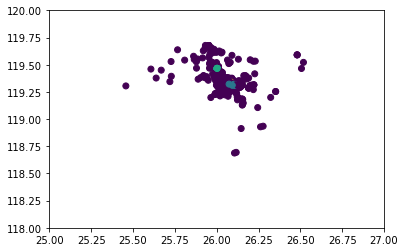

19 0


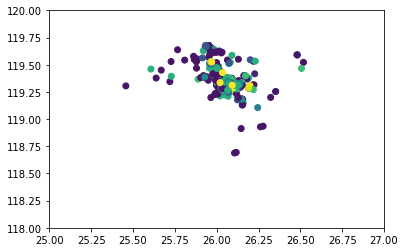

19 0


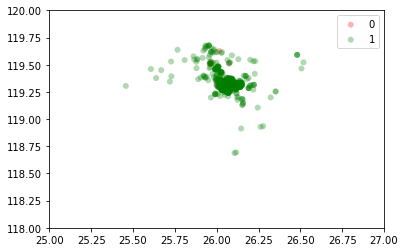

In [9]:
%matplotlib inline

# plt.scatter(X_cor_bad,Y_cor_bad, marker='o')
# plt.axis([25,28,117,120])
# plt.show()


# y_pred=KMeans(n_clusters=3, random_state=9).fit_predict(X_Y_cor_bad)
# print(max(y_pred),min(y_pred))
# # y_pred = [[i] for i in y_pred]
# plt.scatter(X_cor_bad,Y_cor_bad,c=y_pred)
# # plt.plot(X_cor_good,Y_cor_good,'r+')
# plt.axis([24,28,117,120])
# plt.show()


y_pred_2=DBSCAN(eps=0.005,min_samples=30).fit_predict(X_Y_cor_bad)
print(max(y_pred_2),min(y_pred_2))
# y_pred_2= [[i] for i in y_pred_2]
plt.scatter(X_cor_bad,Y_cor_bad, marker = 'o',c=y_pred_2)
# plt.axis([24.5,28,117,120])
plt.axis([25,27,118,120])
plt.show()


y_pred_3=cate_bad
print(max(y_pred_3),min(y_pred_3))
# y_pred_3= [[i] for i in y_pred_3]
plt.scatter(X_cor_bad,Y_cor_bad, marker = 'o',c=y_pred_3)
plt.axis([25,27,118,120])
plt.show()


y_pred_4=[]
for i in ent_bad:
    if i> 0:
        y_pred_4.append(1)
    else:
        y_pred_4.append(0)
print(max(y_pred_3),min(y_pred_3))
# y_pred_3= [[i] for i in y_pred_3]

X_cor_bad_zero = []
Y_cor_bad_zero = []
X_cor_bad_one = []
Y_cor_bad_one = []

for i in range(len(y_pred_4)):
    if y_pred_4[i] == 0:
        X_cor_bad_zero.append(X_cor_bad[i])
        Y_cor_bad_zero.append(Y_cor_bad[i])
    else:
        X_cor_bad_one.append(X_cor_bad[i])
        Y_cor_bad_one.append(Y_cor_bad[i])

for color in ['red', 'green']:
    if color == 'red':
        plt.scatter(X_cor_bad_zero, Y_cor_bad_zero, c=color, label='0',
               alpha=0.3, edgecolors='none')
    else:
        plt.scatter(X_cor_bad_one, Y_cor_bad_one, c=color, label='1',
               alpha=0.3, edgecolors='none')

plt.legend()
# plt.axis([24,28,117,120])
plt.axis([25,27,118,120])
plt.show()



# # covariance_type = ['spherical', 'tied', 'diag', 'full']
# # gmm1=mixture.GaussianMixture(n_components=2, covariance_type='full').fit(elements)
# # y_pred3=gmm1.predict(elements)
# # plt.scatter(X_cor,Y_cor,y_pred3)
# # plt.show()

# import matplotlib.pyplot as plt
# from numpy.random import rand


# fig, ax = plt.subplots()
# for color in ['red', 'green', 'blue']:
#     n = 750
#     x, y = rand(2, n)
#     scale = 200.0 * rand(n)
#     ax.scatter(x, y, c=color, s=scale, label=color,alpha=0.3, edgecolors='none')

# ax.legend()
# ax.grid(True)

# plt.show()

#### 对较低信用企业进行数据分析

In [10]:
y_4=[]
for i in ent_bad:
    if i> 0:
        y_4.append(1)
    else:
        y_4.append(0)

In [11]:
for i in range(min(y_pred_2),max(y_pred_2)):
    print(i,list(y_pred_2).count(i))
    
density_index=[i for i in range(len(y_pred_2)) if y_pred_2[i]==3]

-1 742
0 36
1 314
2 45
3 34


#### 将结果点数据写入txt中

In [13]:
with open('badcompany_cor_test2.txt','a',encoding='utf-8') as f:
    for i in density_index:
        f.write(str(X_Y_cor_bad[i])+'|')